In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
from sklearn.datasets import load_iris,make_classification,make_blobs
from pprint import pprint
import warnings 

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)

sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

In [11]:
iris = load_iris()

X = iris.data
y = iris.target 

In [12]:
X, y = make_blobs(random_state = 2023, cluster_std = 5, n_samples = 500)

Text(0.5, 1.0, '원 데이터의 군집')

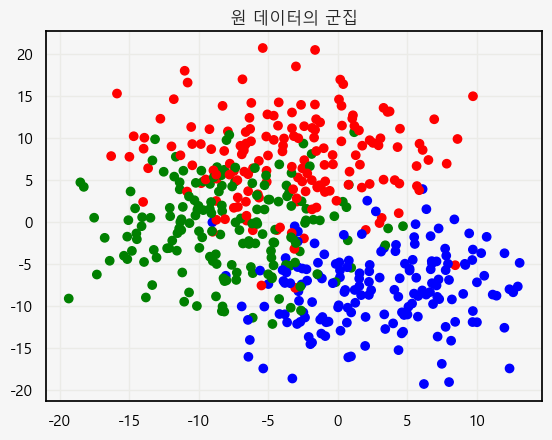

In [13]:
color = ['red' if _ == 0 else 'blue' if _ == 1 else 'green' for _ in y]

fig,ax = plt.subplots()

ax.scatter(X[:,0], X[:,1], color = color)

ax.set_title('원 데이터의 군집')

# **K means clustering**

K-means clustering 은 비지도 학습 (Unsupervise Learning)의 일종 

- 트레이닝 케이스에 대한 True value 를 모르는 상태에서 데이터의 패턴(군집) 을 찾는 것 
- 군집 분석의 주 목적은 Latent variable 에 대해서 Optimal assignment 를 찾는 것

### **K-means clusterring 은 EM algorithm**

    * 1. Expectation : 주어진 파라미터 (centroid) 에 따른 입력 데이터들 assignment
    * 2. Maximization : 주어진 입력값 (xi) 에 따른 파라미터 (centroid)를 찾기 

    - 위 과정을 반복하며 적절한 centroid 와 군집 형성

Text(0.5, 1.1, 'Iteration 횟수에 따라 달라지는 군집의 중심점 및 군집 결과')

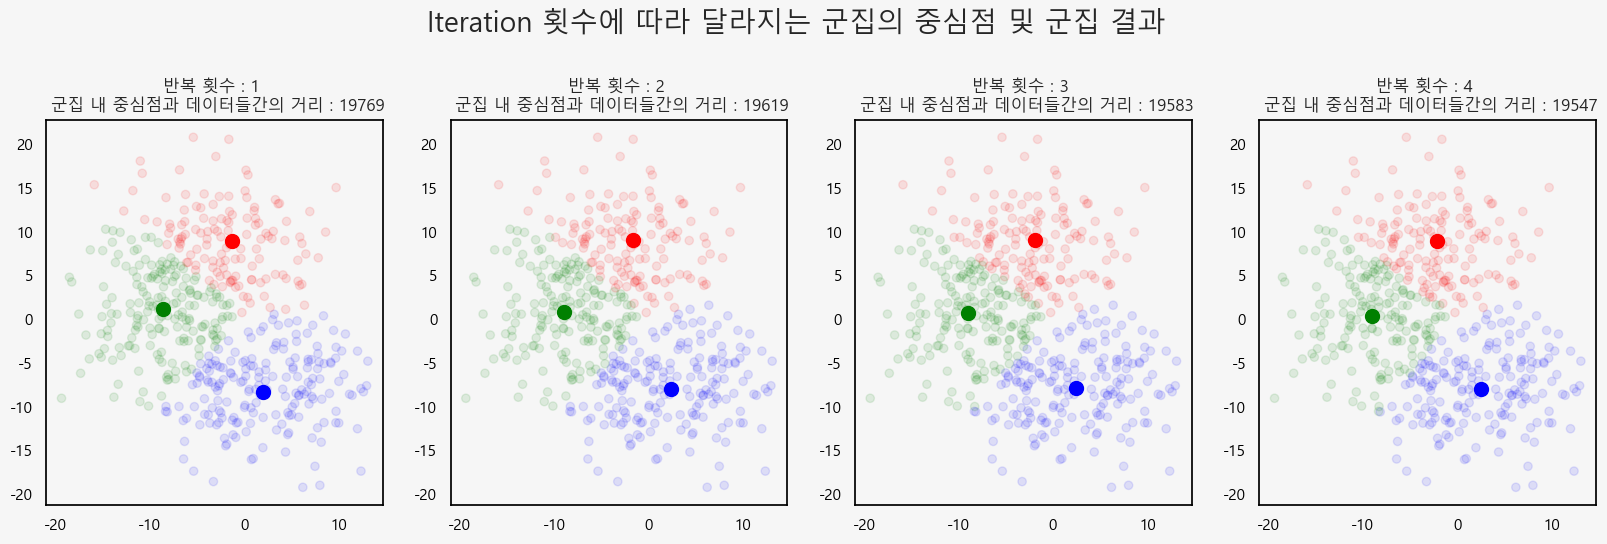

In [14]:
from sklearn.cluster import KMeans

iterations = [1,2,3,4]
K = 3 
fig,ax = plt.subplots(ncols  = 4,figsize = (20,5))

ax = ax.flatten()

for i,iteration in enumerate(iterations):
    
    k_means = KMeans(n_clusters = K,max_iter = iteration, random_state = 42,
                        init = 'k-means++')
    
    label = k_means.fit_predict(X) # 각 iteration 별로 label 값 예측 
    centroid = k_means.cluster_centers_
    inertia = round(k_means.inertia_)
    color = ['blue' if _ == 0 else 'red' if _  == 1 else 'green' for _ in label]
    # marker = np.array([1 if _ == 0 else 2 if _ == 1 else 3 for _ in label])
    ax[i].scatter(X[:,0], X[:,1], color = color, alpha = 0.1)
    ax[i].set_title(f'반복 횟수 : {iteration} \n 군집 내 중심점과 데이터들간의 거리 : {inertia}')
    
    
    c = ['blue','red','green']
    
    for k in range(K):
        ax[i].scatter(centroid[k,0],centroid[k,1], s = 100, c = c[k])
        ax[i].grid()
        
fig.suptitle('Iteration 횟수에 따라 달라지는 군집의 중심점 및 군집 결과', y = 1.1, fontsize = 20)

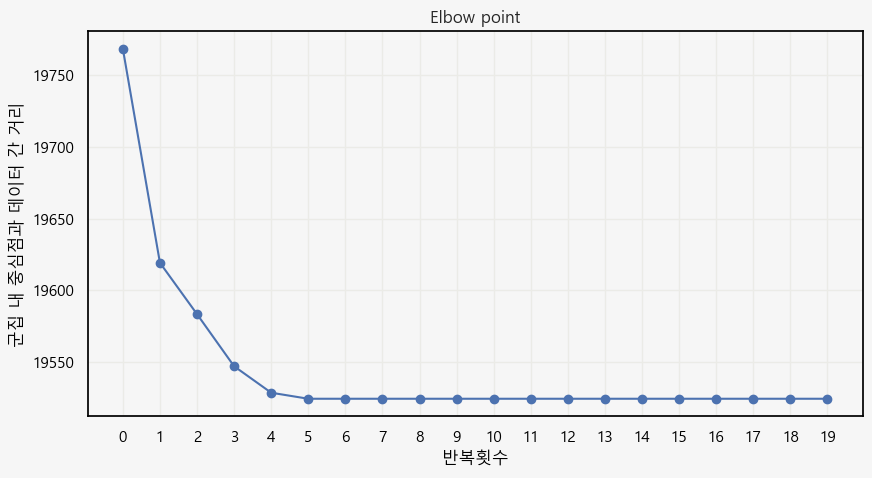

In [15]:
inertias = []

for i in range(1,21):
    
    k_means = KMeans(random_state = 42, max_iter = i, n_clusters = 3)
    k_means.fit(X)
    inertias.append(k_means.inertia_)
    
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(inertias, marker = 'o')
ax.set_xlabel('반복횟수')
ax.set_ylabel('군집 내 중심점과 데이터 간 거리')
ax.set_title('Elbow point')
ax.set_xticks(np.arange(0,20));

### **다른 평가 지표 Silhouette 통계량**


$\text{{Silhouette Coefficient}} = \frac{{b - a}}{{\max(a, b)}}$


$-1 <= {{Silhouette Coefficient}} <= 1$

* b : 서로 다른 군집 간 평균 거리
* a : 같은 군집 내 데이터 간 거리들 중 가장 최소의 거리

* 분모에 있는 max(a,b) 는 분자의 b - a 값을 -1 과 1 사이의 값을 스케일링 해주는 스케일링 값


* 실루엣 계수는 데이터의 개수 n 개 만큼 나오며, 전체 군집의 평균 실루엣 값은 실루엣 계수의 평균값으로 생각한다. 
* 이 때 실루엣 계수가 평균적으로 0.5 이상이면 군집화가 잘 되었다고 판단한다.

* 군집화가 잘 되었을 경우 각 군집 별 거리는 늘어나고, 군집 내 가장 가까운 거리는 작아지므로  실루엣 값이 커질  것이고, 반대의 경우엔 실루엣 값이 작아질 것이다.

In [16]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [17]:
# 실루엣 그래프 그리기 

silhouette_value = silhouette_samples(X,label) # 각 i 번째 데이터 및 군집에 대한 실루엣 계수값이 구해짐

print(silhouette_value[:10])

[0.4215209  0.5347594  0.32921971 0.46791156 0.43766767 0.3364499
 0.55329241 0.61889884 0.20388341 0.36197249]


Text(0.5, 1.0, '평균 실루엣 계수 값 : 0.38')

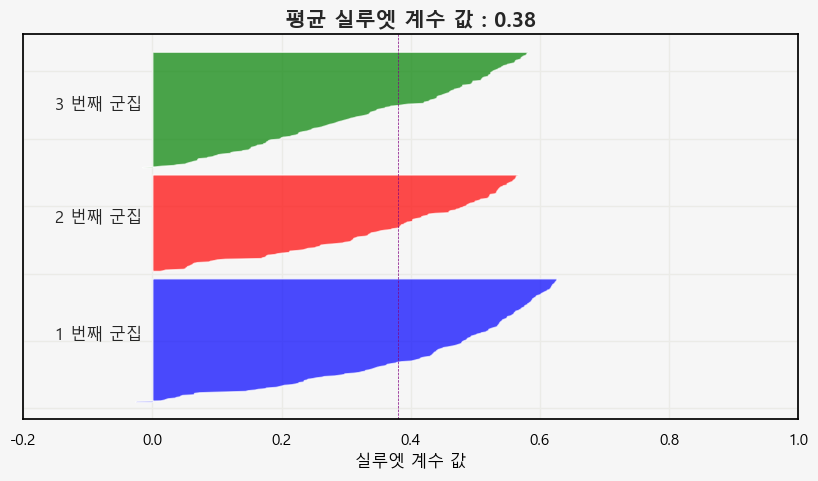

In [18]:
fig,ax = plt.subplots(figsize = (10,5))

y_lower =  10 # 밑에서부터 실루엣 계수를 fill_between 할거야

color = ['blue','red','green']

for i in range(K): # 군집 개수 별로 실루엣 그래프를 그리자 
    
    s_value = silhouette_value[label == i] # i 번째 군집인 값들의 value 만 가져오자
    s_value.sort() 
    
    y_upper = y_lower + s_value.shape[0] # y_lower 위치에서 i 번째 군집의 개수만큼 그 사이를 채울거야 
    
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0 , s_value, facecolor = color[i],
                        alpha = 0.7)
    ax.text(-0.15, (y_upper + y_lower )/ 2, f'{i + 1} 번째 군집')
    
    y_lower = y_upper + 10 # 다음 군집은 현재의 y_upper 보다 +10 위치에서부터 시작하게 
    

# 전체 레이블 별 평균 실루엣 계수 값 생성    
score = silhouette_score(X,label)

ax.set_xlim([-0.2,1])
ax.set_yticklabels('')
ax.axvline(score , c  = 'purple', ls = '--', lw = 0.5)
ax.set_xlabel('실루엣 계수 값')
ax.set_title(f'평균 실루엣 계수 값 : {round(score,2)}', fontsize = 15, weight = 'bold')

# **적절한 군집 K 개 찾기**

Text(0.5, 1.0, '몇 개의 군집으로 살펴보는게 적절할까 ?')

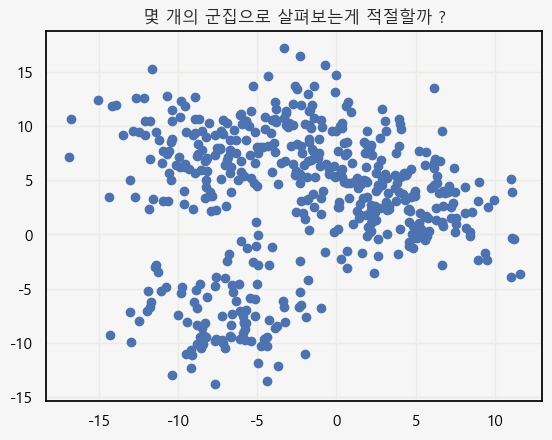

In [19]:
X,y = make_blobs(cluster_std = 3, n_samples = 500, centers = 5, random_state = 42) # 임의의 데이터 생성 

plt.scatter(X[:,0],X[:,1])
plt.title('몇 개의 군집으로 살펴보는게 적절할까 ?')

### **Elbow point**

**군집 개수에 따른 SSE 값을 플로팅 하여 SSE가 완만하게 꺾이기 시작하는 Elbow point를 찾기**

Text(0.5, 1.0, '군집 개수 별 SSE \n elbow point : 3개 ')

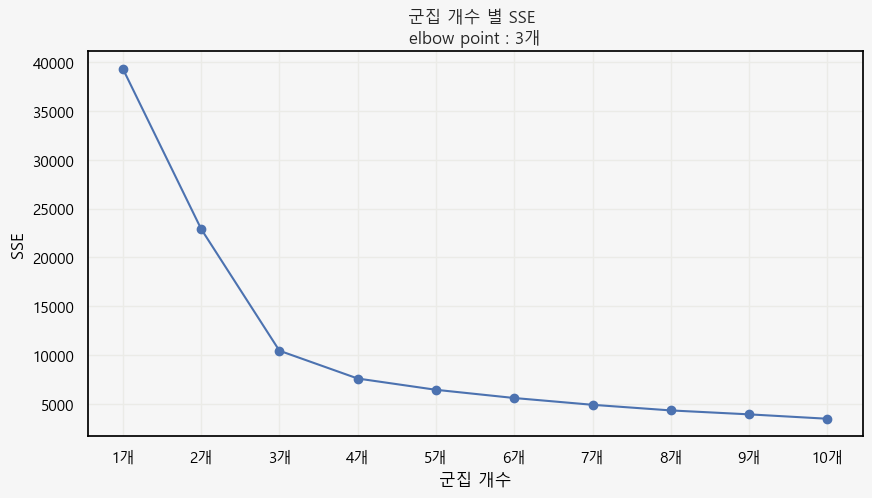

In [20]:
# elbow point 로 적절한 군집 개수  찾기 

fig,ax = plt.subplots(figsize = (10,5))

SSE = []

for i in range(1,11): # 최대 10개의 군집을 가지고 테스트 해보자 
    
    k_means = KMeans(max_iter = 100, n_clusters = i, init = 'k-means++')
    k_means.fit(X)
    SSE.append(k_means.inertia_)
    
ax.plot(SSE, marker = 'o')
ax.set_ylabel('SSE')
ax.set_xlabel('군집 개수')
ax.set_xticks(np.arange(0,10))
ax.set_xticklabels([f'{i+1}개' for i in range(10)])
ax.set_title('군집 개수 별 SSE \n elbow point : 3개 ')

### **실루엣 계수로 찾기**

Text(0.5, 0.98, '군집이 3개일 때가 가장  실루엣 계수가 낮다')

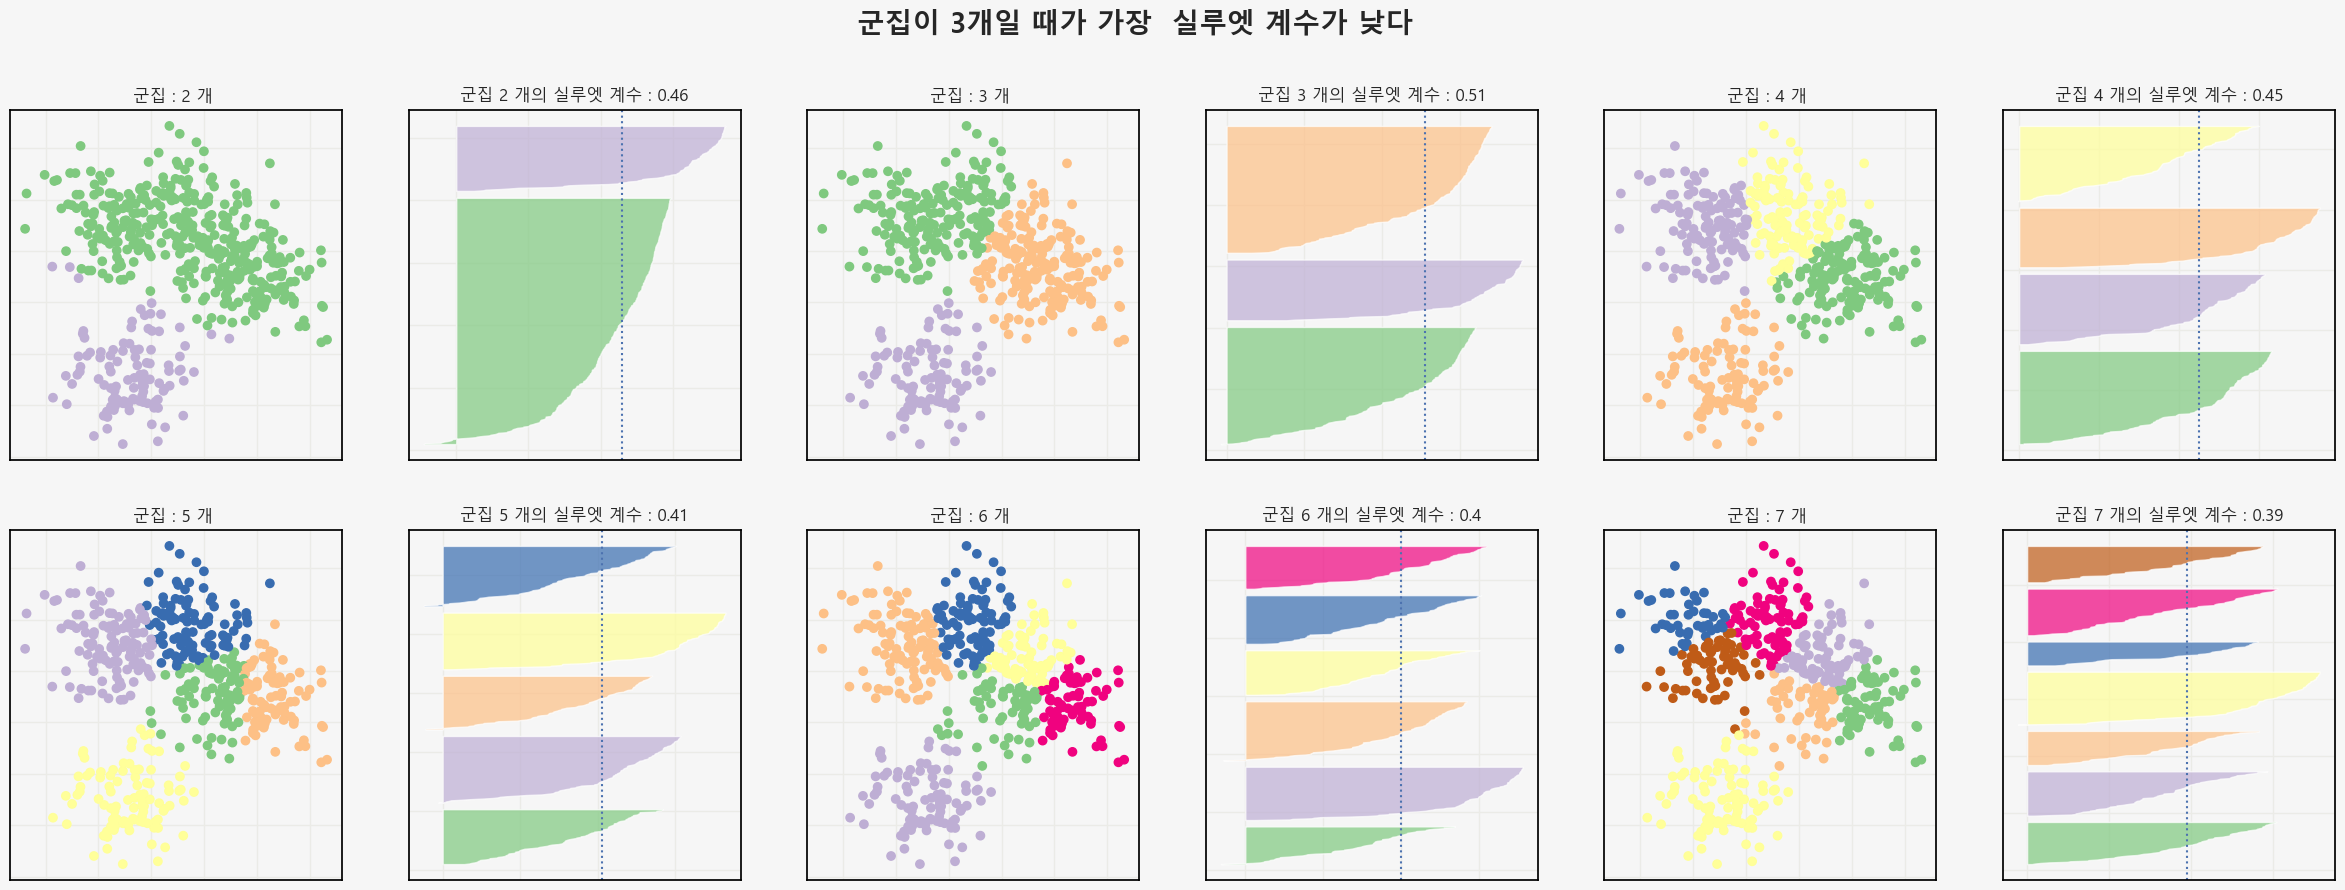

In [21]:
fig,ax = plt.subplots(ncols = 6,nrows = 2, figsize = (30,10))
ax = ax.flatten()
a,b = 0,1

colors = sns.color_palette('Accent', n_colors = 10)


for i in range(2,8): # 최대 7개의 군집을 가지고 테스트 해보자 
    
    k_means = KMeans(max_iter = 100, n_clusters = i, init = 'k-means++', random_state = 42)
    
    labels = k_means.fit_predict(X)
    cluster_colors = [colors[l] for l in labels]
    
    ax[a].scatter(X[:,0],X[:,1],c = cluster_colors)
    ax[a].set_xticklabels('')
    ax[a].set_yticklabels('')
    ax[a].set_title(f'군집 : {i} 개 ')

    y_lower = 10
    
    for s in range(i):
        
        s_value = silhouette_samples(X,labels)[labels == s]
        s_value.sort()
        
        y_upper = y_lower + s_value.shape[0]
        
        
        ax[b].fill_betweenx(np.arange(y_lower,y_upper), 0 , s_value, alpha = 0.7, facecolor = colors[s])
        
        y_lower = y_upper + 10
    
    score = round(silhouette_score(X,labels),2)   
    ax[b].set_xticklabels('')
    ax[b].set_yticklabels('')    
    ax[b].axvline(score, ls = ':')
    ax[b].set_title(f'군집 {i} 개의 실루엣 계수 : {score}')
    a += 2   
    b += 2 
    
fig.suptitle('군집이 3개일 때가 가장  실루엣 계수가 낮다',fontsize = 20, weight = 'bold')

### **군집 분석 장단점**

﻿

장점


1. 단순성 : K-means clutering 은 간단하고 이해하기 쉬운 알고리즘이다.

2. 효율성 : 계산적으로 효율적이며 적은 시간 복잡도로 대규모 데이터 세트를 처리 할 수 있다.

3. 확장성 : 데이터의 양이 많더라도, 또 많은 변수가 있더라도 잘 처리 할 수 있다.

4. 해석 가능한 결과 : 각 그룹을 명확하게 군집화하여 EDA 를 통해 특성을 파악 할 수 있다.



단점


1. 초기화에 대한 민감도 : 맨 처음 중심의 초기 배치에 민감하다. 만약 초기 중심점이 엉터리라면 군집 결과도 엉터리로 나올 수있음으로 다양한 초기화 알고리즘을 통해 군집화 해봐야 한다.

2. 클러스터 수 고정 : 최적의 클러스터 수를 알 수 없거나 주관적일 때 선택이 어려울 수 있다.

3. 유클리드 거리 가정 : K-means 는 모든 유형의 데이터 패턴에 적절하지 않을 수 있다. 데이터 패턴에 맞는 데이터포인트 별 거리를 구하는 method 를 찾아야 한다.

4. 군집 모양 및 크기에 대한 가정 : K -means 는 군집이 모두 구형이고, 크기 및 밀도가 비슷하다고 가정한다. 만약 군집 별 크기가 다르거나, 밀도가 다른 경우, 그리고 군집 별 모양이 지역적인 특성을 가질 경우 어려움을 겪을 수 있다.

﻿

In [38]:
from sklearn.datasets  import make_moons

X,y = make_moons(n_samples = 500, noise = 0.1)

Text(0.5, 1.1, '군집 분석은 지역적 패턴을 보이는 경우 약한 모습을 보인다')

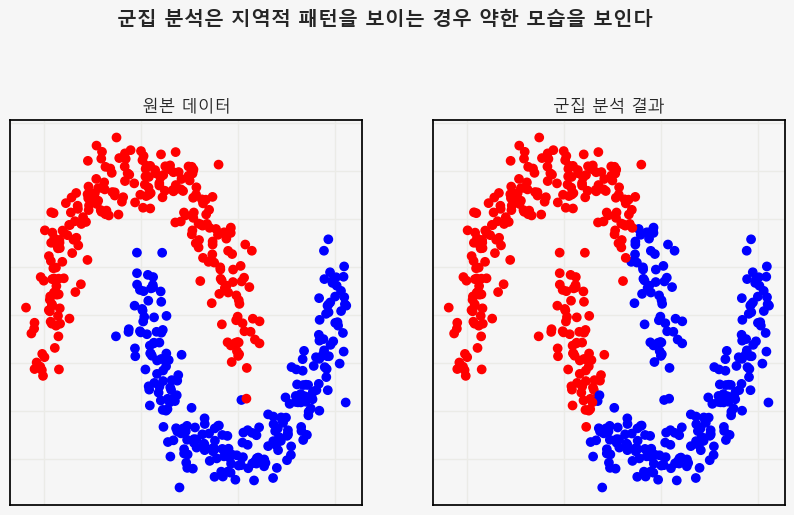

In [42]:
fig,ax = plt.subplots(ncols= 2, figsize = (10,5))

colors = ['red' if _ == 0 else 'blue' for _ in y]

ax[0].scatter(X[:,0], X[:,1], c = colors)
ax[0].set_yticklabels('')
ax[0].set_xticklabels('')
ax[0].set_title('원본 데이터')

k_means = KMeans(n_clusters = 2)

labels = k_means.fit_predict(X)

cluster_colors = ['red' if _ == 0 else 'blue' for _ in labels]

ax[1].scatter(X[:,0], X[:,1], c = cluster_colors)
ax[1].set_yticklabels('')
ax[1].set_xticklabels('')
ax[1].set_title('군집 분석 결과')
fig.suptitle('군집 분석은 지역적 패턴을 보이는 경우 약한 모습을 보인다', y = 1.1 , weight = 'bold')